## Estudo de dados da Prefeitura do Recife acerca dos acidentes de trânsito em 2020

Importação das bibliotecas e leitura do arquivo, usando o "head()", "shape" e "columns" para ter acesso a estrutura dos dados

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Paulo\Desktop\Programação\acidentes_recife\acidentes_2020-novo.csv",sep=";")

In [3]:
df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,01/01/2020,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2020,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,60 km/h,Dupla,Canteiro central,NaN,NaN
2,01/01/2020,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
3,01/01/2020,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,BOA VIAGEM,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Única,Faixa seccionada,NaN,NaN
4,01/01/2020,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,PAISSANDU,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Faixa contínua,Faixa seccionada,Canteiro central


In [4]:
df.shape

(4093, 38)

In [5]:
df.columns

Index(['data', 'hora', 'natureza_acidente', 'situacao', 'bairro', 'endereco',
       'numero', 'detalhe_endereco_acidente', 'complemento',
       'bairro_cruzamento', 'num_semaforo', 'sentido_via', 'tipo', 'descricao',
       'auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao',
       'viatura', 'outros', 'vitimas', 'vitimasfatais', 'acidente_verificado',
       'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via',
       'conservacao_via', 'ponto_controle', 'situacao_placa',
       'velocidade_max_via', 'mao_direcao', 'divisao_via1', 'divisao_via2',
       'divisao_via3'],
      dtype='object')

## Primeiro filtro de dados, usando uma estrutura condicional para manter apenas os acidentes com pelo menos 1 vítima, usando  também o groupby para escolher as variáveis não numéricas que são interessantes manter, que no caso são os nomes dos bairros e a condição da via

In [20]:
bairros_perigosos = df[df["vitimas"]>=1].groupby(
                    "bairro")[["bairro","vitimas",
                    "vitimasfatais"]]

In [21]:
bairros_perigosos.head()

,bairro,vitimas,vitimasfatais
7,PINA,2.0,NaN
8,MADALENA,1.0,NaN
14,BOA VIAGEM,1.0,NaN
16,AREIAS,1.0,NaN
23,BARRO,1.0,NaN
...,...,...,...
3977,CIDADE UNIVERSITÁRIA,1.0,NaN
4036,MORRO DA CONCEIÇÃO,1.0,NaN
4042,ALTO JOSÉ DO PINHO,1.0,NaN
4082,SÍTIO DOS PINTOS,1.0,NaN


## Soma do número de vítimas já levando em consideração os agrupamentos, gerando assim somatório do número de vítimas por bairro e por condição de via

In [22]:
t = bairros_perigosos.agg({"vitimas": "sum", "vitimasfatais": "sum"})

In [23]:
t.head()

,vitimas,vitimasfatais
bairro,,
AFLITOS,3.0,0.0
AFOGADOS,58.0,0.0
ALTO JOSÉ BONIFÁCIO,6.0,0.0
ALTO JOSÉ DO PINHO,8.0,0.0
ALTO SANTA TERESINHA,2.0,0.0


## Ordenamento pelo número de vítimas

In [24]:
b = t.sort_values(by="vitimas", ascending=False)

## Variável criada para ser inserida, como o plot a seguir necessita de uma coluna como eixo x e essa coluna deve ser a lista de bairros já na ordem de número de vítimas, é necessário criar uma variável para ser inserida na tabela

In [25]:
anexar = list(b.index)

In [26]:
print(anexar)

['BOA VIAGEM', 'IMBIRIBEIRA', 'SANTO AMARO', 'MADALENA', 'IBURA', 'PINA', 'CAMPO GRANDE', 'CORDEIRO', 'IPSEP', 'CASA AMARELA', 'AFOGADOS', 'BOA VISTA', 'VÁRZEA', 'SÃO JOSÉ', 'IPUTINGA', 'ÁGUA FRIA', 'ARRUDA', 'DERBY', 'TORRE', 'ESPINHEIRO', 'ENCRUZILHADA', 'CASA FORTE', 'AREIAS', 'TEJIPIÓ', 'JORDÃO', 'CAXANGÁ', 'ROSARINHO', 'TAMARINEIRA', 'ILHA DO RETIRO', 'BARRO', 'PRADO', 'PARNAMIRIM', 'ESTÂNCIA', 'SAN MARTIN', 'BEBERIBE', 'SANTO ANTÔNIO', 'GRAÇAS', 'ILHA JOANA BEZERRA', 'BONGI', 'CABANGA', 'TORRÕES', 'JARDIM SÃO PAULO', 'DOIS IRMÃOS', 'JOANA BEZERRA', 'CAMPINA DO BARRETO', 'ENGENHO DO MEIO', 'DOIS UNIDOS', 'VASCO DA GAMA', 'MACAXEIRA', 'MANGUEIRA', 'APIPUCOS', 'ILHA DO LEITE', 'BAIRRO DO RECIFE', 'LINHA DO TIRO', 'MANGABEIRA', 'FUNDÃO', 'JIQUIÁ', 'CAJUEIRO', 'NOVA DESCOBERTA', 'TORREÃO', 'MUSTARDINHA', 'ALTO JOSÉ DO PINHO', 'JAQUEIRA', 'SÍTIO DOS PINTOS', 'SANCHO', 'CIDADE UNIVERSITÁRIA', 'PASSARINHO', 'ALTO JOSÉ BONIFÁCIO', 'PAISSANDU', 'MONTEIRO', 'MORRO DA CONCEIÇÃO', 'COELHOS', 

### Inserção dos bairros na tabelha

In [27]:
b.insert(1,"bairro_plot", anexar)

In [28]:
b.head()

,vitimas,bairro_plot,vitimasfatais
bairro,,,
BOA VIAGEM,222.0,BOA VIAGEM,1.0
IMBIRIBEIRA,107.0,IMBIRIBEIRA,0.0
SANTO AMARO,93.0,SANTO AMARO,1.0
MADALENA,91.0,MADALENA,0.0
IBURA,68.0,IBURA,0.0


In [29]:
b["vitimas"].sum()

2088.0

## Como Boa Viagem foi o bairro com maior número de acidentes, foi usado de referência de consulta no arquivo fonte para checagem do procedimento que se mostrou adequado, pois os resultados foram iguais.

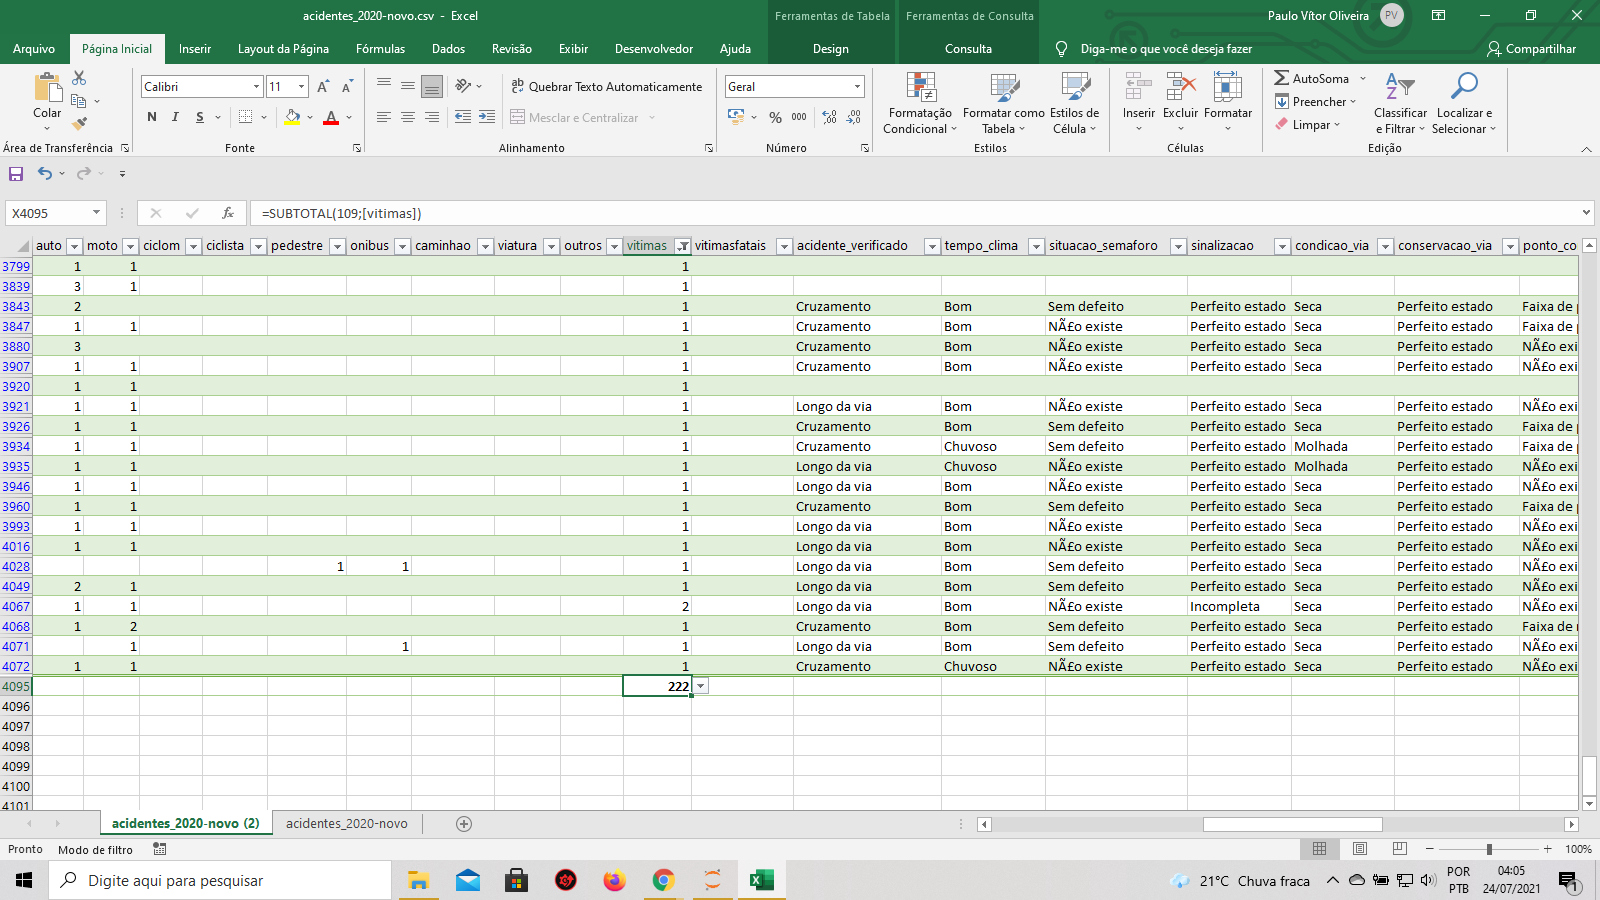

In [30]:
b.loc[b.index=="BOA VIAGEM"]["vitimas"].sum()

222.0

## De maneira elementar foi realizada uma plotagem com a ferramenta built in do Pandas para essa finalidade, posteriormente serão realizadas plotagens e subplotagens para avaliar diferentes parâmetros com a biblioteca Matplotlib

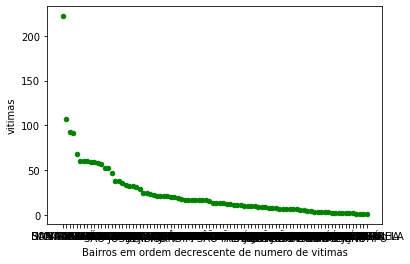

In [31]:
ax1 = b.plot.scatter(x="bairro_plot" ,y = "vitimas",
                    xlabel="Bairros em ordem decrescente de numero de vitimas",
                    color="green",grid=False)